<a href="https://colab.research.google.com/github/lacastanop/se-alesys/blob/main/Parcial1_punto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                **RESPUESTA DEL SISTEMA**
# Discusión
Conclusión para la Segunda Visualización (Señal Muestreada, Cuantizada y Respuesta del Sistema LTI):
La segunda visualización muestra la señal muestreada y cuantizada junto con la respuesta del sistema LTI. Se observa que la salida del sistema ha sido convolucionada con la respuesta al escalón, lo que amplifica significativamente la amplitud de la señal.

Respuesta del Sistema LTI: La convolución de la señal cuantizada con la respuesta al escalón ha resultado en una salida que muestra cómo se transforma la señal a medida que pasa a través del sistema LTI. La salida del sistema es significativamente mayor en amplitud que la señal de entrada cuantizada, lo que indica una alta ganancia o amplificación en el sistema.
Visualización: La señal muestreada y cuantizada se muestra con claridad, pero la respuesta del sistema domina la gráfica debido a su gran amplitud. Esto podría hacer que sea más difícil visualizar y analizar las características de la señal de entrada y su relación con la salida.
La conclusión en este caso es que la respuesta del sistema ha sido correctamente calculada, pero el rango dinámico de la visualización podría ser mejor ajustado para permitir una comparación más clara entre la señal de entrada y la salida. El ajuste de la escala de la gráfica o una atención más detallada al rango de valores del sistema podría mejorar la utilidad de la visualización.

Muestreo: La elección de una frecuencia de muestreo de 200 Hz fue adecuada para las frecuencias involucradas en la señal, lo que implica que no debería haber aliasing y la señal original se podría reconstruir a partir de las muestras discretas.

Cuantización: La cuantización con 4 bits introduce un error de cuantización notable, donde la resolución es insuficiente para representar con precisión la amplitud de la señal original. Esto resulta en un escalonamiento visible en la señal cuantizada.

Visualización: La gráfica claramente muestra los efectos de la cuantización con puntos rojos unidos por líneas, lo que proporciona una indicación visual útil de cómo la señal es alterada por este proceso.

En ambas visualizaciones, es esencial tener en cuenta la aplicación final de la señal y el sistema para determinar si el nivel de fidelidad es suficiente o si se necesitan ajustes en el proceso de muestreo y cuantización.

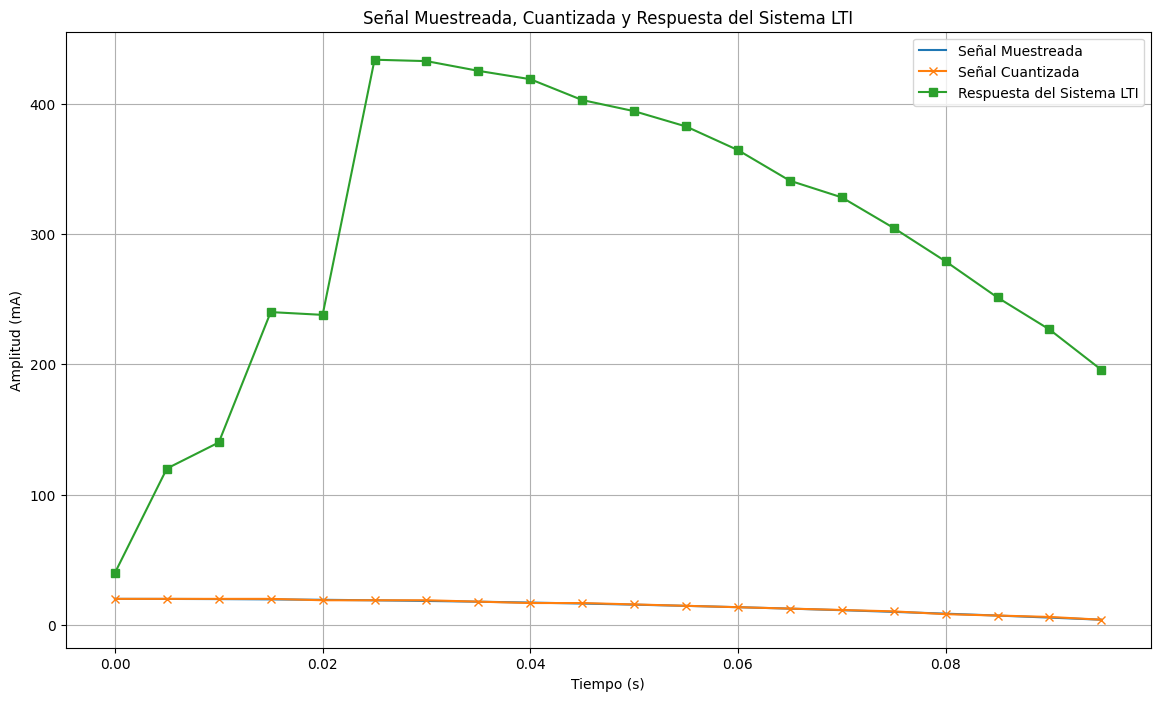

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Parámetros de la señal
Fs = 200  # Frecuencia de muestreo en Hz
Ts = 1 / Fs  # Período de muestreo
t = np.arange(0, 0.1, Ts)  # Muestra la señal durante 0.1 segundos

# Señal x(t) muestreada
x_t = 20 * (np.cos(t / 3) + np.cos(t / 4))  # A amperios

# Escalar y cuantizar la señal al rango de entrada del ADC [4mA, 20mA]
x_t_scaled = 4 + (x_t - np.min(x_t)) * (16 / (np.max(x_t) - np.min(x_t)))  # 4mA a 20mA
nbits = 4
niveles = 2 ** nbits
x_t_cuantizada = np.round((x_t_scaled - 4) / (20 - 4) * (niveles - 1))
x_t_cuantizada = x_t_cuantizada / (niveles - 1) * (20 - 4) + 4

# Respuesta al escalón del sistema LTI
he = np.array([2, 4, 1, 5, 0, 10])
y_n = convolve(x_t_cuantizada, he, mode='full')[:len(t)]  # Convolución

# Gráficos
plt.figure(figsize=(14, 8))

# Gráfico de la señal muestreada y cuantizada con líneas
plt.plot(t, x_t_scaled, 'C0-', label='Señal Muestreada')
plt.plot(t, x_t_cuantizada, 'C1x-', label='Señal Cuantizada')

# Gráfico de la salida del sistema con líneas
plt.plot(t, y_n, 'C2s-', label='Respuesta del Sistema LTI')

plt.title('Señal Muestreada, Cuantizada y Respuesta del Sistema LTI')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mA)')
plt.legend()
plt.grid(True)
plt.show()
